In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity



In [5]:

movies = pd.read_csv("ml-latest-small/ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ml-latest-small/ratings.csv")

In [6]:
movie_rating_counts = ratings.groupby(["movieId"]).size().reset_index(name='count')

movie_rating_counts

,movieId,count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [7]:
counter = {1: 0,
           2: 0,
           193609: 0,
           4: 0}
keys = counter.keys()
for movie in ratings.itertuples(index=False):
    if movie.movieId in keys:
        counter[movie.movieId] +=1
counter

{1: 215, 2: 110, 193609: 1, 4: 7}

In [77]:
movies = movies.drop("index",axis=1)
#movies =  pd.merge(movies, movie_rating_counts, on="movieId", how='inner')
movies

,movieId,title,genres,count,Action,Adventure,Animation,Children,Comedy,Crime,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),adventure|animation|children|comedy|fantasy,215,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),adventure|children|fantasy,110,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),comedy|romance,52,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,5,Father of the Bride Part II (1995),comedy,49,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,Heat (1995),action|crime|thriller,102,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,152081,Zootopia (2016),action|adventure|animation|children|comedy,32,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1415,164179,Arrival (2016),sci-fi,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1416,166528,Rogue One: A Star Wars Story (2016),action|adventure|fantasy|sci-fi,27,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1417,168252,Logan (2017),action|sci-fi,25,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
movies = movies[movies['count'].notna()]
movies


,movieId,title,genres,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1
9721,193585,Flint (2017),Drama,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1


/tmp/ipykernel_32140/879205820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies['count'])


Text(0.5, 1.0, 'Histogram of vote counts')

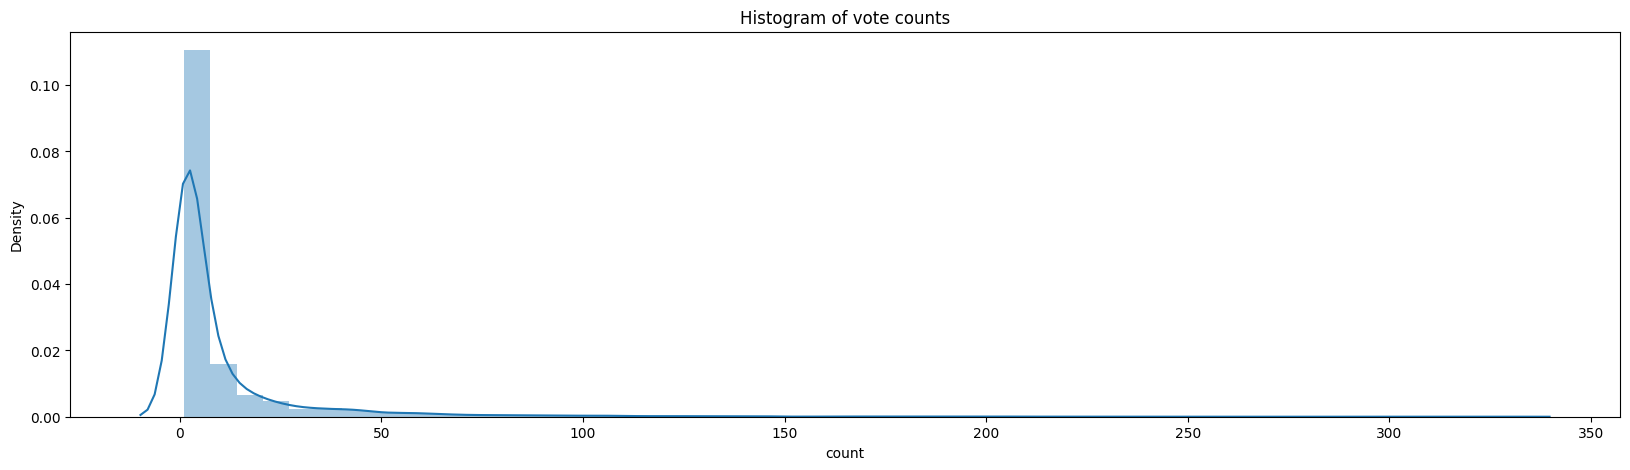

In [13]:
plt.figure(figsize=(20,5))

sns.distplot(movies['count'])

plt.title("Histogram of vote counts")

In [16]:
min_votes = np.percentile(movies['count'].values, 85)
min_votes


17.0

In [17]:
movies = movies.copy(deep=True).loc[movies['count'] > min_votes]
movies

,movieId,title,genres,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
4,5,Father of the Bride Part II (1995),Comedy,49
5,6,Heat (1995),Action|Crime|Thriller,102
...,...,...,...,...
9205,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,32
9374,164179,Arrival (2016),Sci-Fi,26
9415,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,27
9445,168252,Logan (2017),Action|Sci-Fi,25


In [71]:
# removing rows with missing overview
movies = movies[movies['genres'].notna()]
movies.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [72]:
genres_list = movies["genres"].str.get_dummies(sep="|")
# Concatenate the binary genre columns back to the 'movies' DataFrame
movies = pd.concat([movies, genres_list], axis=1)
movies

,level_0,index,movieId,title,genres,count,Action,Adventure,Animation,Children,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,0,0,1,Toy Story (1995),adventure|animation|children|comedy|fantasy,215,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,Jumanji (1995),adventure|children|fantasy,110,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,3,Grumpier Old Men (1995),comedy|romance,52,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4,5,Father of the Bride Part II (1995),comedy,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,6,Heat (1995),action|crime|thriller,102,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1414,9205,152081,Zootopia (2016),action|adventure|animation|children|comedy,32,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1415,1415,9374,164179,Arrival (2016),sci-fi,26,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1416,1416,9415,166528,Rogue One: A Star Wars Story (2016),action|adventure|fantasy|sci-fi,27,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1417,1417,9445,168252,Logan (2017),action|sci-fi,25,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
# processing of overviews

def process_text(text):
    # replace multiple spaces with one
    text = ' '.join(text.split())
    # lowercase
    text = text.lower()
    return text

movies['genres'] = movies.apply(lambda x: process_text(x.genres),axis=1)

In [43]:
tf_idf = TfidfVectorizer(stop_words="english")
tf_idf_matrix = tf_idf.fit_transform(movies['genres'])

In [48]:
cosine_similarity_matrix = cosine_similarity(tf_idf_matrix, tf_idf_matrix)

In [78]:
def idx_from_title(df, title):
    return df[df["title"]==title].index.values[0]

#idx_from_title(movies, "Sabrina (1995)")

def title_from_idx(df, idx):
    return df[df.index==idx]
title_from_idx(movies, 7)

,movieId,title,genres,count,Action,Adventure,Animation,Children,Comedy,Crime,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
7,11,"American President, The (1995)",comedy|drama|romance,70,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
def recommendations( original_title, df,cosine_similarity_matrix,number_of_recommendations):
    index = idx_from_title(df,original_title)
    similarity_scores = list(enumerate(cosine_similarity_matrix[index]))
    similarity_scores_sorted = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    recommendations_indices = [t[0] for t in similarity_scores_sorted[1:(number_of_recommendations+1)]]
    return df['title'].iloc[recommendations_indices]


In [89]:
#recommendations('Toy Story (1995)', movies, cosine_similarity_matrix, 10)
index = idx_from_title(movies, "Toy Story (1995)")


similarity_scores = list(enumerate(cosine_similarity_matrix[index]))
similarity_scores_sorted = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
recommendations_indices = [t[0] for t in similarity_scores_sorted[1:(10+1)]]
movies['title'].iloc[recommendations_indices]


595                          Antz (1998)
753                   Toy Story 2 (1999)
877     Emperor's New Groove, The (2000)
941                Monsters, Inc. (2001)
1206              Shrek the Third (2007)
1409                   Inside Out (2015)
909     Atlantis: The Lost Empire (2001)
1378               The Lego Movie (2014)
902                         Shrek (2001)
572             American Tail, An (1986)
Name: title, dtype: object